In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import env
import joint_prepare

In [2]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
query = '''
Select * from logs
left join cohorts on logs.cohort_id = cohorts.id
ORDER BY date ASC, time ASC;
'''
df = pd.read_sql(query, url)

In [4]:
df,df_admin = joint_prepare.prepare_logs(df )

In [5]:
df.head()

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,program_id,primary_topic,subtopic,tertiary
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,1.0,,,None
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,1.0,java-ii,None,None
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,1.0,java-ii,object-oriented-programming,None
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,1.0,slides,object_oriented_programming,None
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2.0,javascript-i,conditionals,None


In [ ]:
g = sns.catplot(x="name", hue="program_id",
                data=df, kind="count",
                height=8, aspect=1);

Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
boolean column showing whether row accessed path in between start/end date of student (user id, being unique)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [6]:
df.head(2)

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,program_id,primary_topic,subtopic,tertiary
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,1.0,,,None
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,1.0,java-ii,None,None


- filter out for active students by comparing the date of the hit to a date between the start and end dates

In [7]:
active_students = df[(df.date <= df.end_date)|(df.date >= df.start_date)]

In [8]:
#describe value counts of user_id, shows hits
active_students.user_id.value_counts().describe()

count      911.000000
mean       930.108672
std       1236.014277
min          1.000000
25%        193.000000
50%        697.000000
75%       1298.500000
max      17913.000000
Name: user_id, dtype: float64

- because the user_id is used on multiple rows, set it as index so it can be explored

In [9]:
active_students = active_students.set_index('user_id')

In [10]:
active_students.head()

,date,time,path,cohort_id,ip,name,start_date,end_date,created_at,program_id,primary_topic,subtopic,tertiary
user_id,,,,,,,,,,,,,
1,2018-01-26,09:55:03,/,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,1.0,,,None
1,2018-01-26,09:56:02,java-ii,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,1.0,java-ii,None,None
1,2018-01-26,09:56:05,java-ii/object-oriented-programming,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,1.0,java-ii,object-oriented-programming,None
1,2018-01-26,09:56:06,slides/object_oriented_programming,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,1.0,slides,object_oriented_programming,None
2,2018-01-26,09:56:24,javascript-i/conditionals,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2.0,javascript-i,conditionals,None


- simplify dataframe, drop unused columns

In [11]:
active_students = active_students.drop(columns=['start_date','end_date','created_at','date','time'])

In [12]:
active_students.head()

,path,cohort_id,ip,name,program_id,primary_topic,subtopic,tertiary
user_id,,,,,,,,
1,/,8.0,97.105.19.61,Hampton,1.0,,,None
1,java-ii,8.0,97.105.19.61,Hampton,1.0,java-ii,None,None
1,java-ii/object-oriented-programming,8.0,97.105.19.61,Hampton,1.0,java-ii,object-oriented-programming,None
1,slides/object_oriented_programming,8.0,97.105.19.61,Hampton,1.0,slides,object_oriented_programming,None
2,javascript-i/conditionals,22.0,97.105.19.61,Teddy,2.0,javascript-i,conditionals,None


- utilizing simplified dataframe, we setup where we draw the line for limited use of active students, around 150 hits, below the lower IQR of 193

In [20]:
active_students[active_students.index.value_counts() <=150].groupby(['user_id','name'],axis=0)

In [ ]:
temp = pd.DataFrame(active_students[active_students.index.value_counts() <=150].groupby('user_id').name.value_counts())

In [26]:
temp.sort_index()

,,name
user_id,name,
13,Teddy,94
21,Niagara,107
24,Sequoia,26
45,Sequoia,65
46,Teddy,54
...,...,...
977,Oberon,86
978,Oberon,55
979,Oberon,127


- Question 3: by filtering the dates between the range of start and end date, we isolated the active students. after some basic analysis, we established a baseline for 'low usage' values that fall below the 25% IQR from there, because each observation has a user_id, and that user_id can show up multiple times, we set the index to the user_id, this allowed us to 

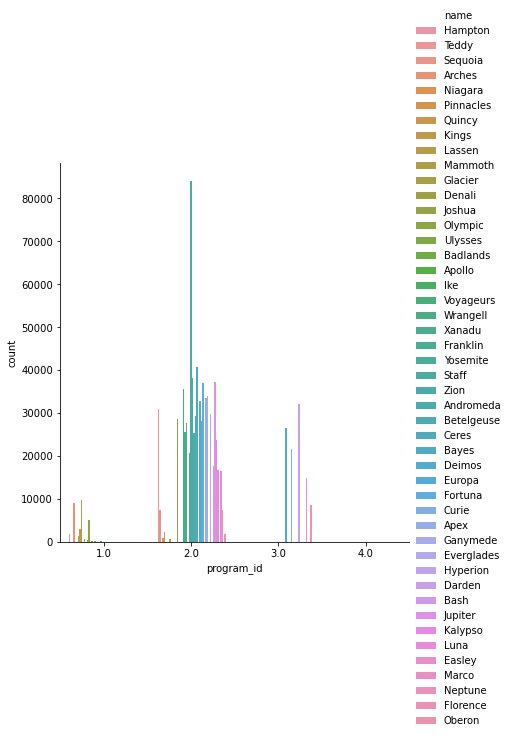

In [28]:
g = sns.catplot(x="program_id", hue="name",
                data=active_students, kind="count",
                height=6, aspect=1);

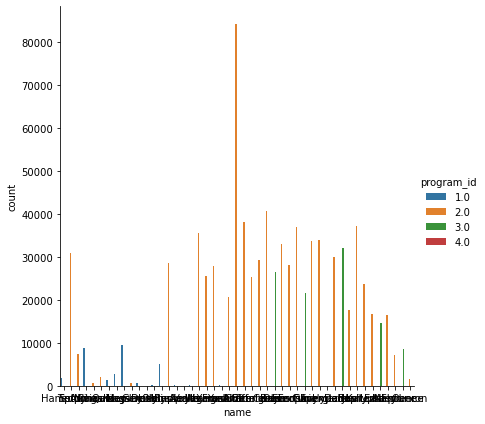

In [29]:
g = sns.catplot(x="name", hue="program_id",
                data=active_students, kind="count",
                height=6, aspect=1);